In [1]:
from qibo.core.circuit import Circuit
from qibo.gates import M, X, RX
import numpy as np
from qiboconnection.api import API
from qiboconnection.connection import ConnectionConfiguration

from qililab.constants import DEFAULT_PLATFORM_NAME
from qililab.experiment import Experiment, settings

configuration = ConnectionConfiguration(
    user_id=3,
    username="qili-admin-test",
    api_key="d31d38f4-228e-4898-a0a4-4c4139d0f79f",
)

connection = API(configuration=configuration)

[qibo-connection] 0.3.9|DEBUG|2022-05-30 16:19:09]: Qibo Quantum Service API SERVER URL: https://qilimanjaro.ddns.net:8080
[qibo-connection] 0.3.9|DEBUG|2022-05-30 16:19:11]: Calling: https://qilimanjaro.ddns.net:8080/api/v1/authorisation-tokens
DEBUG:qiboconnection.config:Calling: https://qilimanjaro.ddns.net:8080/api/v1/authorisation-tokens
[qibo-connection] 0.3.9|DEBUG|2022-05-30 16:19:11]: Connection successfully established.
DEBUG:qiboconnection.config:Connection successfully established.
[qibo-connection] 0.3.9|INFO|2022-05-30 16:19:11]: Storing personal qibo configuration...
INFO:qiboconnection.config:Storing personal qibo configuration...


In [2]:
print(settings)

{
    "hardware_average": 1024,
    "software_average": 1,
    "repetition_duration": 200000,
    "translation": {
        "readout_pulse": {
            "amplitude": 0.4,
            "duration": 2000,
            "phase": 0
        },
        "delay_between_pulses": 0,
        "delay_before_readout": 50,
        "gate_duration": 100,
        "num_sigmas": 4,
        "drag_coefficient": 0
    }
}


In [3]:
settings.repetition_duration = 200000

In [5]:
circuits = []
for rotation in np.linspace(0, 3*np.pi):
    circuit = Circuit(1)
    circuit.add(RX(0, rotation))
    circuit.add(M(0))
    circuits.append(circuit)
experiment = Experiment(platform_name=DEFAULT_PLATFORM_NAME, sequences=circuits, settings=settings)

[qililab] [0.3.0|INFO|2022-05-30 16:19:30]: Building platform
INFO:qililab.config:Building platform


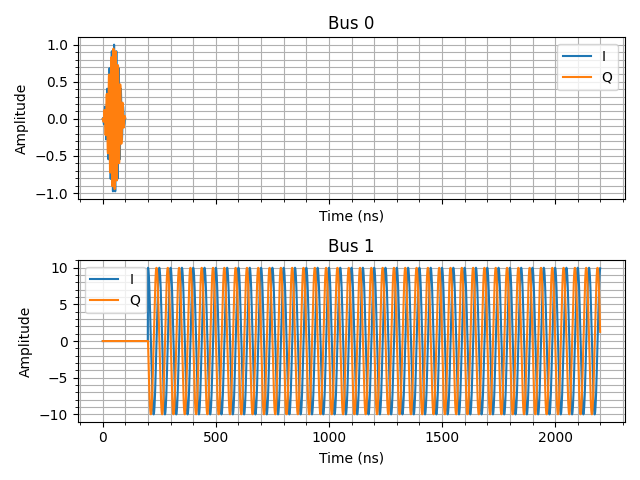

In [7]:
%matplotlib widget
# %matplotlib notebook
experiment.set_parameter(category="signal_generator", id_=0, parameter="frequency", value=3.451759e9)
experiment.set_parameter(category="signal_generator", id_=1, parameter="frequency", value=7.347367e9)
results = experiment.execute(connection=connection)
results.draw(connection=connection)